In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
struktur = pd.read_csv('../../Daten/Strukturindikatoren/strukturindikatoren_gesamt.csv', index_col = 0)
wahl_diff = pd.read_csv('../../Daten/Wahlergebnisse/differenzen_gesamt.csv', index_col = 0)

data = struktur.merge(wahl_diff, on = 'Gebietsnummer')

wahlbezirke = gpd.read_file('../../Daten/Karte/wahlbezirke.shp')
stadtteile = gpd.read_file('../../Daten/Karte/stadtteile.shp')
wahlbezirke = wahlbezirke.rename(columns = {'Gebietsnum': 'Gebietsnummer'})

In [5]:
struktur.columns

Index(['Gebietsnummer', 'Bevölkerung 2013', 'Bevölkerung 2017',
       'Bevölkerung 2020', 'Anteil Deutsche Bevölkerung 2013',
       'Anteil Nichtdeutsche EU Bevölkerung 2013',
       'Anteil Nichtdeutsche nicht EU Bevölkerung 2013',
       'Anteil Deutsche Bevölkerung 2017',
       'Anteil Nichtdeutsche EU Bevölkerung 2017',
       'Anteil Nichtdeutsche nicht EU Bevölkerung 2017',
       'Anteil Deutsche Bevölkerung 2020',
       'Anteil Nichtdeutsche EU Bevölkerung 2020',
       'Anteil Nichtdeutsche nicht EU Bevölkerung 2020',
       'Anteil Migrationshintergrund Bevölkerung 2013',
       'Anteil Migrationshintergrund Bevölkerung 2017',
       'Anteil Migrationshintergrund Bevölkerung 2020',
       'Anteil Ledige Bevölkerung 2013',
       'Anteil Verheiratete Bevölkerung 2013',
       'Anteil Ledige Bevölkerung 2017',
       'Anteil Verheiratete Bevölkerung 2017',
       'Anteil Ledige Bevölkerung 2020',
       'Anteil Verheiratete Bevölkerung 2020',
       'Anteil 18 - 24 Jährige 

In [6]:
struktur_17 = struktur[['Gebietsnummer', 'Anteil Deutsche Bevölkerung 2017',
       'Anteil Nichtdeutsche EU Bevölkerung 2017',
       'Anteil Nichtdeutsche nicht EU Bevölkerung 2017', 'Anteil Migrationshintergrund Bevölkerung 2017', 
        'Anteil Verheiratete Bevölkerung 2017', 'Anteil 18 - 24 Jährige Wahlberechtigte 2017',
       'Anteil 25 - 34 Jährige Wahlberechtigte 2017',
       'Anteil 35 - 44 Jährige Wahlberechtigte 2017',
       'Anteil 45 - 59 Jährige Wahlberechtigte 2017',
       'Anteil 60 Jährige und ältere Wahlberechtigte 2017', 'Anteil Einpersonenhaushalte 2017', 
        'Anteil Haushalte mit Kind(ern) 2017', 'durchschnittliche Wohndauer 2017', 'SV-Beschäftigtendichte 2017',
       'Arbeitslosendichte 2017', 'ALG II - Empfängerdichte 2017', 'Wahlbeteiligung 2017']]

## PCA

In [7]:
pca_data = struktur_17.drop(columns = ['Gebietsnummer', 'SV-Beschäftigtendichte 2017',
       'Arbeitslosendichte 2017', 'ALG II - Empfängerdichte 2017'])
pca = PCA(n_components = 5)
pca.fit(pca_data)
print(pca.explained_variance_ratio_)

[9.95019182e-01 2.99777633e-03 1.17802064e-03 2.52839041e-04
 1.87616687e-04]


Koeffizienten der Hauptkomponenten

In [8]:
principal_components = pd.DataFrame(columns = pca_data.columns)
for row in range(len(pca.components_)):
    principal_components.loc[row] = pca.components_[row]

In [9]:
principal_components

,Anteil Deutsche Bevölkerung 2017,Anteil Nichtdeutsche EU Bevölkerung 2017,Anteil Nichtdeutsche nicht EU Bevölkerung 2017,Anteil Migrationshintergrund Bevölkerung 2017,Anteil Verheiratete Bevölkerung 2017,Anteil 18 - 24 Jährige Wahlberechtigte 2017,Anteil 25 - 34 Jährige Wahlberechtigte 2017,Anteil 35 - 44 Jährige Wahlberechtigte 2017,Anteil 45 - 59 Jährige Wahlberechtigte 2017,Anteil 60 Jährige und ältere Wahlberechtigte 2017,Anteil Einpersonenhaushalte 2017,Anteil Haushalte mit Kind(ern) 2017,durchschnittliche Wohndauer 2017,Wahlbeteiligung 2017
0,-0.006194,0.004426,0.001769,0.002220,-0.013820,0.004059,0.014124,0.005242,-0.006014,-0.017411,0.010735,-0.002937,-0.999497,0.006511
1,-0.440856,0.119060,0.321796,0.614684,0.132392,0.057883,-0.121881,-0.060517,0.036239,0.088277,-0.311883,0.196374,-0.006433,-0.354550
2,0.258130,-0.149834,-0.108296,-0.159328,0.219665,0.045384,-0.219978,0.133471,0.237221,-0.196099,-0.636278,0.469753,-0.013045,0.192019
3,-0.138806,0.021968,0.116838,-0.198954,0.057559,0.064685,-0.431902,-0.175399,-0.160160,0.702777,-0.156633,-0.134092,-0.016965,0.373986
4,0.124216,-0.418537,0.294321,-0.054070,-0.521055,0.569147,-0.051159,-0.202415,-0.211986,-0.103586,-0.063412,0.093518,0.006909,-0.111130


Dimensionsreduktion der Strukturindikatoren

In [10]:
pca_data_transformed = pca.transform(pca_data)

In [11]:
struktur_pca = pd.DataFrame(columns=['Gebietsnummer', 'comp_1', 'comp_2', 'comp_3'])
struktur_pca['Gebietsnummer'] = struktur_17['Gebietsnummer']
for index in range(len(pca_data_transformed)):
    struktur_pca.loc[index, 'comp_1'] = pca_data_transformed[index][0]
    struktur_pca.loc[index, 'comp_2'] = pca_data_transformed[index][1]
    struktur_pca.loc[index, 'comp_3'] = pca_data_transformed[index][2]

In [12]:
struktur_pca.head()

,Gebietsnummer,comp_1,comp_2,comp_3
0,3001,0.236515,-0.283285,-0.049984
1,3002,0.0379398,-0.291981,0.0267399
2,3003,5.45831,-0.193063,-0.0606555
3,3004,3.55365,-0.236563,-0.0694848
4,3005,2.59049,-0.189891,-0.0715417


## Clustering

### KMeans

In [13]:
kmeans = KMeans(n_clusters=3, n_init=100).fit(struktur_pca.drop(columns = 'Gebietsnummer'))
labels = kmeans.labels_

In [14]:
kmeans.cluster_centers_

array([[-4.08129876e+00,  4.93398130e-02,  7.86549212e-03],
       [ 4.80135142e-01, -5.58764366e-02, -2.13648739e-03],
       [ 4.90747983e+00,  4.22889201e-02, -6.99974952e-03]])

In [15]:
kmeans.inertia_

299.86446797952215

In [16]:
struktur_transformed = struktur_pca.copy()
struktur_transformed['Label'] = 0
for index in range(len(labels)):
    struktur_transformed.loc[index, 'Label'] = labels[index]

In [17]:
struktur_transformed.head()

,Gebietsnummer,comp_1,comp_2,comp_3,Label
0,3001,0.236515,-0.283285,-0.049984,1
1,3002,0.0379398,-0.291981,0.0267399,1
2,3003,5.45831,-0.193063,-0.0606555,2
3,3004,3.55365,-0.236563,-0.0694848,2
4,3005,2.59049,-0.189891,-0.0715417,1


In [18]:
label_plot = wahlbezirke.set_index('Gebietsnummer').join(struktur_transformed.set_index('Gebietsnummer'))

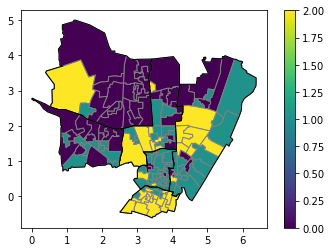

In [19]:
fig, ax = plt.subplots()
label_plot.plot(ax = ax, column = 'Label', legend = True, edgecolor = 'grey')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()

In [23]:
struktur_17['Label'] = struktur_transformed['Label'] + 1

struktur_17.to_csv('../../Daten/Wahlergebnissestruktur_17_labeled.csv')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
struktur_17.loc[struktur_17['Label'] == 2].describe()

,Gebietsnummer,Anteil Deutsche Bevölkerung 2017,Anteil Nichtdeutsche EU Bevölkerung 2017,Anteil Nichtdeutsche nicht EU Bevölkerung 2017,Anteil Migrationshintergrund Bevölkerung 2017,Anteil Verheiratete Bevölkerung 2017,Anteil 18 - 24 Jährige Wahlberechtigte 2017,Anteil 25 - 34 Jährige Wahlberechtigte 2017,Anteil 35 - 44 Jährige Wahlberechtigte 2017,Anteil 45 - 59 Jährige Wahlberechtigte 2017,Anteil 60 Jährige und ältere Wahlberechtigte 2017,Anteil Einpersonenhaushalte 2017,Anteil Haushalte mit Kind(ern) 2017,durchschnittliche Wohndauer 2017,SV-Beschäftigtendichte 2017,Arbeitslosendichte 2017,ALG II - Empfängerdichte 2017,Wahlbeteiligung 2017,Label
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.0
mean,8072.884058,0.736555,0.142661,0.120783,0.411463,0.340912,0.086670,0.236195,0.166002,0.229258,0.281875,0.581861,0.154851,18.324721,0.571783,0.032362,0.043957,0.808696,2.0
std,4215.321447,0.089478,0.041455,0.056890,0.112291,0.048703,0.032056,0.052447,0.027107,0.043145,0.050907,0.093973,0.065553,1.142848,0.025554,0.009197,0.019380,0.066399,0.0
min,3001.000000,0.451758,0.068615,0.041463,0.256247,0.252733,0.052734,0.109643,0.095461,0.164148,0.154557,0.261477,0.078418,16.218691,0.530000,0.025000,0.024000,0.561000,2.0
25%,4013.000000,0.688591,0.114203,0.072768,0.322080,0.309853,0.069967,0.195024,0.147665,0.204590,0.248375,0.541216,0.114149,17.447674,0.572000,0.025000,0.027000,0.778000,2.0
50%,10011.000000,0.752133,0.133390,0.117381,0.389679,0.333634,0.078600,0.244695,0.166448,0.216632,0.277188,0.600297,0.141335,18.421491,0.585000,0.029000,0.042000,0.832000,2.0
75%,12003.000000,0.809981,0.162588,0.151850,0.463573,0.376825,0.090784,0.271466,0.186094,0.246905,0.318244,0.648903,0.171685,19.143617,0.585000,0.046000,0.070000,0.858000,2.0
max,24006.000000,0.872935,0.298180,0.268029,0.700573,0.478187,0.278364,0.345578,0.226874,0.423382,0.404994,0.713875,0.447106,20.566964,0.603000,0.046000,0.073000,0.883000,2.0


In [25]:
struktur_17.loc[struktur_17['Label'] == 1].describe()

,Gebietsnummer,Anteil Deutsche Bevölkerung 2017,Anteil Nichtdeutsche EU Bevölkerung 2017,Anteil Nichtdeutsche nicht EU Bevölkerung 2017,Anteil Migrationshintergrund Bevölkerung 2017,Anteil Verheiratete Bevölkerung 2017,Anteil 18 - 24 Jährige Wahlberechtigte 2017,Anteil 25 - 34 Jährige Wahlberechtigte 2017,Anteil 35 - 44 Jährige Wahlberechtigte 2017,Anteil 45 - 59 Jährige Wahlberechtigte 2017,Anteil 60 Jährige und ältere Wahlberechtigte 2017,Anteil Einpersonenhaushalte 2017,Anteil Haushalte mit Kind(ern) 2017,durchschnittliche Wohndauer 2017,SV-Beschäftigtendichte 2017,Arbeitslosendichte 2017,ALG II - Empfängerdichte 2017,Wahlbeteiligung 2017,Label
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.0
mean,15806.591837,0.719231,0.130611,0.150158,0.462553,0.414970,0.086442,0.168918,0.133626,0.260831,0.350184,0.490324,0.192371,22.883603,0.577837,0.041878,0.063857,0.739755,1.0
std,7098.663515,0.083171,0.025485,0.069131,0.125023,0.042523,0.018316,0.030579,0.025365,0.040810,0.070059,0.070876,0.044407,1.464943,0.022247,0.007265,0.013888,0.099768,0.0
min,4011.000000,0.529491,0.065217,0.053478,0.237391,0.307286,0.056617,0.094406,0.069231,0.145455,0.216488,0.386100,0.098446,20.680147,0.530000,0.025000,0.027000,0.454000,1.0
25%,10016.000000,0.659372,0.114170,0.088022,0.360345,0.392772,0.077746,0.147973,0.117397,0.233520,0.308803,0.433183,0.161516,21.964525,0.572000,0.045000,0.070000,0.671000,1.0
50%,12004.000000,0.724943,0.126899,0.131365,0.450145,0.421199,0.083494,0.169333,0.133958,0.252617,0.340470,0.473071,0.189300,22.527822,0.582000,0.045000,0.070000,0.756000,1.0
75%,24010.000000,0.787659,0.150534,0.198570,0.559235,0.446136,0.092737,0.189279,0.146475,0.289365,0.380084,0.516835,0.225732,23.686873,0.585000,0.046000,0.070000,0.815000,1.0
max,24022.000000,0.881304,0.197781,0.310189,0.705152,0.501475,0.174933,0.235448,0.187500,0.358466,0.604895,0.677058,0.284942,26.435897,0.603000,0.046000,0.073000,0.878000,1.0


### Vergleich mit SPD-Verlusten

In [26]:
spd_plot = wahlbezirke.set_index('Gebietsnummer').join(wahl_diff.set_index('Gebietsnummer'))

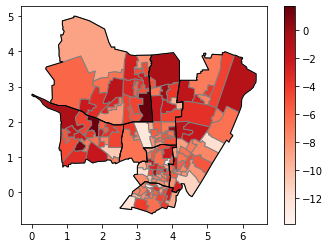

In [27]:
fig, ax = plt.subplots()
spd_plot.plot(ax = ax, column = 'Diff_erst_SPD', legend = True, edgecolor = 'grey', cmap = 'Reds')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()

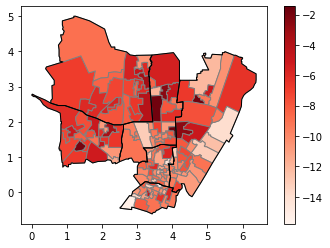

In [28]:
fig, ax = plt.subplots()
spd_plot.plot(ax = ax, column = 'Diff_zweit_SPD', legend = True, edgecolor = 'grey', cmap = 'Reds')
stadtteile.plot(ax = ax, edgecolor = 'Black', facecolor = 'None')
plt.show()

## Korrelationsanalyse pro Cluster

In [29]:
wahl_diff_erst = wahl_diff[['Gebietsnummer', 'Diff_erst_CSU', 'Diff_erst_SPD', 'Diff_erst_GRÜNE', 'Diff_erst_FDP', 
                           'Diff_erst_DIE LINKE']].merge(struktur_17, on = 'Gebietsnummer')
wahl_diff_zweit = wahl_diff[['Gebietsnummer', 'Diff_zweit_CSU', 'Diff_zweit_SPD', 'Diff_zweit_GRÜNE', 'Diff_zweit_FDP',
                            'Diff_zweit_DIE LINKE', 'Diff_zweit_AfD']].merge(struktur_17, on = 'Gebietsnummer')


In [30]:
wahl_diff_erst['Label'] = struktur_transformed['Label']
wahl_diff_zweit['Label'] = struktur_transformed['Label']

Label 0

In [31]:
wahl_diff_erst_0 = wahl_diff_erst.loc[wahl_diff_erst['Label'] == 0]

In [32]:
wahl_diff_erst_0.drop(columns = ['Gebietsnummer', 'Label']).corr()

,Diff_erst_CSU,Diff_erst_SPD,Diff_erst_GRÜNE,Diff_erst_FDP,Diff_erst_DIE LINKE,Anteil Deutsche Bevölkerung 2017,Anteil Nichtdeutsche EU Bevölkerung 2017,Anteil Nichtdeutsche nicht EU Bevölkerung 2017,Anteil Migrationshintergrund Bevölkerung 2017,Anteil Verheiratete Bevölkerung 2017,...,Anteil 35 - 44 Jährige Wahlberechtigte 2017,Anteil 45 - 59 Jährige Wahlberechtigte 2017,Anteil 60 Jährige und ältere Wahlberechtigte 2017,Anteil Einpersonenhaushalte 2017,Anteil Haushalte mit Kind(ern) 2017,durchschnittliche Wohndauer 2017,SV-Beschäftigtendichte 2017,Arbeitslosendichte 2017,ALG II - Empfängerdichte 2017,Wahlbeteiligung 2017
Diff_erst_CSU,1.000000,-0.515433,-0.221401,-0.223137,-0.116265,-0.080476,-0.036419,0.110246,0.069391,-0.328282,...,-0.095752,-0.324065,0.110509,0.324113,-0.291422,-0.101382,-0.170230,-0.238980,-0.235626,-0.040394
Diff_erst_SPD,-0.515433,1.000000,-0.068647,0.020769,-0.162217,0.201114,-0.271132,-0.142007,-0.175117,0.109264,...,-0.053823,0.101042,-0.003141,-0.045857,-0.023298,0.099598,0.308813,0.088355,0.044477,0.193312
Diff_erst_GRÜNE,-0.221401,-0.068647,1.000000,0.260830,0.008718,0.532895,-0.306010,-0.528313,-0.557391,0.259797,...,0.233874,0.393735,-0.192901,-0.170806,0.062636,0.066966,-0.099434,-0.104217,-0.094991,0.549578
Diff_erst_FDP,-0.223137,0.020769,0.260830,1.000000,0.176917,0.641187,-0.219404,-0.690526,-0.651216,0.044079,...,0.462129,0.258074,-0.260807,0.030054,-0.090326,0.016926,0.003281,-0.209798,-0.232759,0.654665
Diff_erst_DIE LINKE,-0.116265,-0.162217,0.008718,0.176917,1.000000,0.075930,0.016397,-0.097396,-0.051950,-0.003186,...,0.210306,0.021203,-0.122610,0.055092,-0.043381,0.025313,-0.002995,-0.086617,-0.098451,0.104097
Anteil Deutsche Bevölkerung 2017,-0.080476,0.201114,0.532895,0.641187,0.075930,1.000000,-0.657625,-0.960662,-0.958104,0.034293,...,0.380827,0.333827,-0.292130,0.162057,-0.350604,0.249360,-0.101742,-0.415935,-0.441456,0.865627
Anteil Nichtdeutsche EU Bevölkerung 2017,-0.036419,-0.271132,-0.306010,-0.219404,0.016397,-0.657625,1.000000,0.422535,0.519786,0.100858,...,-0.135398,-0.293130,0.276382,-0.120441,0.198855,-0.162938,0.095387,0.347848,0.367767,-0.441004
Anteil Nichtdeutsche nicht EU Bevölkerung 2017,0.110246,-0.142007,-0.528313,-0.690526,-0.097396,-0.960662,0.422535,1.000000,0.961071,-0.078440,...,-0.408256,-0.293563,0.249572,-0.150570,0.348502,-0.239937,0.087241,0.372176,0.395536,-0.878855
Anteil Migrationshintergrund Bevölkerung 2017,0.069391,-0.175117,-0.557391,-0.651216,-0.051950,-0.958104,0.519786,0.961071,1.000000,-0.010852,...,-0.354052,-0.235505,0.196158,-0.216242,0.413176,-0.252629,0.019715,0.374897,0.410027,-0.887160
Anteil Verheiratete Bevölkerung 2017,-0.328282,0.109264,0.259797,0.044079,-0.003186,0.034293,0.100858,-0.078440,-0.010852,1.000000,...,0.031059,0.478965,-0.089713,-0.799091,0.493987,0.197006,0.332751,0.566986,0.571996,0.196623


Label 1

In [33]:
wahl_diff_erst_1 = wahl_diff_erst.loc[wahl_diff_erst['Label'] == 1]
wahl_diff_erst_1.drop(columns = ['Gebietsnummer', 'Label']).corr()

,Diff_erst_CSU,Diff_erst_SPD,Diff_erst_GRÜNE,Diff_erst_FDP,Diff_erst_DIE LINKE,Anteil Deutsche Bevölkerung 2017,Anteil Nichtdeutsche EU Bevölkerung 2017,Anteil Nichtdeutsche nicht EU Bevölkerung 2017,Anteil Migrationshintergrund Bevölkerung 2017,Anteil Verheiratete Bevölkerung 2017,...,Anteil 35 - 44 Jährige Wahlberechtigte 2017,Anteil 45 - 59 Jährige Wahlberechtigte 2017,Anteil 60 Jährige und ältere Wahlberechtigte 2017,Anteil Einpersonenhaushalte 2017,Anteil Haushalte mit Kind(ern) 2017,durchschnittliche Wohndauer 2017,SV-Beschäftigtendichte 2017,Arbeitslosendichte 2017,ALG II - Empfängerdichte 2017,Wahlbeteiligung 2017
Diff_erst_CSU,1.000000,-0.582828,0.046191,0.131971,-0.049777,0.357417,-0.263688,-0.370013,-0.388814,-0.284110,...,0.414826,-0.190704,0.040929,0.356099,-0.363420,-0.041390,0.179099,-0.323678,-0.361117,0.459352
Diff_erst_SPD,-0.582828,1.000000,-0.358952,-0.308146,-0.189761,-0.184050,0.095821,0.219658,0.205171,0.156331,...,-0.158145,0.043065,0.081691,-0.211616,0.219390,0.038584,-0.063582,0.182950,0.199862,-0.257716
Diff_erst_GRÜNE,0.046191,-0.358952,1.000000,-0.049427,-0.067372,0.388813,-0.311075,-0.384863,-0.368397,-0.112409,...,0.220299,0.232241,-0.400995,-0.006662,0.085810,-0.000225,-0.067803,-0.219589,-0.221485,0.353817
Diff_erst_FDP,0.131971,-0.308146,-0.049427,1.000000,-0.078248,0.363377,-0.226750,-0.406303,-0.418141,-0.179150,...,0.279223,-0.166942,0.033985,0.292649,-0.247900,-0.079179,-0.250518,-0.303742,-0.270797,0.345574
Diff_erst_DIE LINKE,-0.049777,-0.189761,-0.067372,-0.078248,1.000000,0.020003,-0.038150,-0.003661,-0.004813,-0.409230,...,-0.165104,-0.225696,-0.221530,0.160342,-0.123596,-0.225051,0.118549,-0.275309,-0.303781,0.032360
Anteil Deutsche Bevölkerung 2017,0.357417,-0.184050,0.388813,0.363377,0.020003,1.000000,-0.874614,-0.935518,-0.954243,-0.354617,...,0.700745,0.103120,-0.483324,0.171011,-0.060310,0.037634,-0.134954,-0.659948,-0.658466,0.876421
Anteil Nichtdeutsche EU Bevölkerung 2017,-0.263688,0.095821,-0.311075,-0.226750,-0.038150,-0.874614,1.000000,0.646942,0.762572,0.169640,...,-0.526229,-0.201241,0.391476,0.116205,-0.165765,-0.178940,0.121569,0.520730,0.513514,-0.717804
Anteil Nichtdeutsche nicht EU Bevölkerung 2017,-0.370013,0.219658,-0.384863,-0.406303,-0.003661,-0.935518,0.646942,1.000000,0.945194,0.434140,...,-0.718702,-0.015550,0.474927,-0.353648,0.215648,0.071199,0.123675,0.658542,0.661469,-0.855414
Anteil Migrationshintergrund Bevölkerung 2017,-0.388814,0.205171,-0.368397,-0.418141,-0.004813,-0.954243,0.762572,0.945194,1.000000,0.464225,...,-0.644821,0.031246,0.407588,-0.347019,0.269729,0.090173,0.142274,0.672330,0.671508,-0.907555
Anteil Verheiratete Bevölkerung 2017,-0.284110,0.156331,-0.112409,-0.179150,-0.409230,-0.354617,0.169640,0.434140,0.464225,1.000000,...,-0.168144,0.627340,0.326486,-0.773426,0.683244,0.488240,0.052265,0.652902,0.671693,-0.325927


Label 2

In [34]:
wahl_diff_erst_2 = wahl_diff_erst.loc[wahl_diff_erst['Label'] == 2]
wahl_diff_erst_2.drop(columns = ['Gebietsnummer', 'Label']).corr()

,Diff_erst_CSU,Diff_erst_SPD,Diff_erst_GRÜNE,Diff_erst_FDP,Diff_erst_DIE LINKE,Anteil Deutsche Bevölkerung 2017,Anteil Nichtdeutsche EU Bevölkerung 2017,Anteil Nichtdeutsche nicht EU Bevölkerung 2017,Anteil Migrationshintergrund Bevölkerung 2017,Anteil Verheiratete Bevölkerung 2017,...,Anteil 35 - 44 Jährige Wahlberechtigte 2017,Anteil 45 - 59 Jährige Wahlberechtigte 2017,Anteil 60 Jährige und ältere Wahlberechtigte 2017,Anteil Einpersonenhaushalte 2017,Anteil Haushalte mit Kind(ern) 2017,durchschnittliche Wohndauer 2017,SV-Beschäftigtendichte 2017,Arbeitslosendichte 2017,ALG II - Empfängerdichte 2017,Wahlbeteiligung 2017
Diff_erst_CSU,1.000000,-0.649879,-0.431338,0.270742,-0.363261,0.088760,0.015118,-0.128558,-0.124218,-0.165401,...,-0.238536,-0.170725,-0.054765,0.208523,-0.253970,0.154945,0.316476,-0.015656,-0.062999,0.181734
Diff_erst_SPD,-0.649879,1.000000,0.209224,-0.366696,-0.004066,0.133310,-0.256513,0.001774,-0.083685,0.062499,...,0.280257,0.100837,-0.009792,-0.032190,0.132575,0.028606,-0.217403,-0.103179,-0.071192,-0.045168
Diff_erst_GRÜNE,-0.431338,0.209224,1.000000,-0.042105,0.311014,0.356650,-0.367504,-0.217702,-0.298230,-0.238462,...,0.282058,-0.272313,-0.262515,-0.101892,0.203863,-0.235880,-0.109629,-0.327165,-0.296496,0.452573
Diff_erst_FDP,0.270742,-0.366696,-0.042105,1.000000,0.055555,0.367390,-0.148999,-0.384467,-0.514578,-0.574566,...,-0.247159,-0.282595,-0.123002,0.548249,-0.531841,0.016611,0.426352,-0.293163,-0.368593,0.530994
Diff_erst_DIE LINKE,-0.363261,-0.004066,0.311014,0.055555,1.000000,0.096657,-0.060350,-0.086390,-0.148360,-0.210104,...,0.112710,-0.440384,-0.111835,0.038635,-0.028479,-0.394879,-0.170065,-0.142660,-0.123657,0.258952
Anteil Deutsche Bevölkerung 2017,0.088760,0.133310,0.356650,0.367390,0.096657,1.000000,-0.676108,-0.857678,-0.907692,-0.391707,...,0.384865,-0.185644,-0.501440,0.433330,-0.213069,0.214859,0.355442,-0.711794,-0.752580,0.768689
Anteil Nichtdeutsche EU Bevölkerung 2017,0.015118,-0.256513,-0.367504,-0.148999,-0.060350,-0.676108,1.000000,0.201028,0.567622,0.438564,...,-0.357557,0.135274,0.397107,-0.052545,-0.111026,0.065894,-0.022055,0.687437,0.669313,-0.629419
Anteil Nichtdeutsche nicht EU Bevölkerung 2017,-0.128558,0.001774,-0.217702,-0.384467,-0.086390,-0.857678,0.201028,1.000000,0.810662,0.214720,...,-0.262155,0.152412,0.389543,-0.539447,0.360758,-0.331642,-0.457172,0.466599,0.533473,-0.582730
Anteil Migrationshintergrund Bevölkerung 2017,-0.124218,-0.083685,-0.298230,-0.514578,-0.148360,-0.907692,0.567622,0.810662,1.000000,0.621781,...,-0.076907,0.409669,0.242398,-0.695671,0.537371,-0.185817,-0.363285,0.724661,0.769864,-0.849428
Anteil Verheiratete Bevölkerung 2017,-0.165401,0.062499,-0.238462,-0.574566,-0.210104,-0.391707,0.438564,0.214720,0.621781,1.000000,...,0.399169,0.712390,0.131079,-0.635826,0.581100,0.208095,-0.124338,0.558250,0.572733,-0.666734
